## PROJECT ANALISIS PELANGGARAN LALULINTAS DI RODE ISLAND USA


In [1]:
#Melakukakan pembacaan data set
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ri=pd.read_csv('police.csv')
print(ri.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [2]:
ri.state.value_counts()


RI    91741
Name: state, dtype: int64

In [3]:
# semua data berisi data pada rhode island state dan negara amerika maka kolom ini dapat dibuang
ri.drop(['county_name','state'], axis='columns', inplace=True)

In [4]:
# buat index menjadi tipe datetime dengan menggabungkan kolom 'stop_date' dan 'stop_time'
combined=ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['date_and_time'] = pd.to_datetime(combined)

# buat 'date_and_time' menjadi index
ri.set_index('date_and_time', inplace=True)
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='date_and_time', length=91741, freq=None)

In [5]:
# kita baung kolom 'stop_date', 'stop_time'
ri.drop('stop_time', axis=1, inplace=True)

## Pada analisa pertama kita ingin melihat apakah ada hubungan antara tingkat pemeriksaan polisi dengan gender pengemudi 

In [6]:
# maka semua data yang null di kolom driver_gender akan di buang
ri.dropna(subset=['driver_gender'], inplace=True)

In [7]:
#data sudah mualai rapi
ri.head()


,stop_date,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [8]:
#perbaiki type data yang mungkin salah
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 12 columns):
stop_date             86536 non-null object
driver_gender         86536 non-null object
driver_race           86536 non-null object
violation_raw         86536 non-null object
violation             86536 non-null object
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null object
is_arrested           86536 non-null object
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null object
dtypes: bool(2), object(10)
memory usage: 7.4+ MB


In [9]:
# kolom driver_gender yang bertype object lebih baik kita rubah ke tipe category
ri['driver_gender'] = ri.driver_gender.astype('category')
# kolom is_arrested dirubah ke tipe boolean
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 12 columns):
stop_date             86536 non-null object
driver_gender         86536 non-null category
driver_race           86536 non-null object
violation_raw         86536 non-null object
violation             86536 non-null object
search_conducted      86536 non-null bool
search_type           3307 non-null object
stop_outcome          86536 non-null object
is_arrested           86536 non-null bool
stop_duration         86536 non-null object
drugs_related_stop    86536 non-null bool
district              86536 non-null object
dtypes: bool(3), category(1), object(8)
memory usage: 6.3+ MB


In [10]:
# kita mualai dengan melihat persentase pelanggara pria dan 
ri.groupby('driver_gender').violation.value_counts(normalize=True)


driver_gender  violation          
F              Speeding               0.658114
               Moving violation       0.138218
               Equipment              0.105199
               Registration/plates    0.044418
               Other                  0.029738
               Seat belt              0.024312
M              Speeding               0.522243
               Moving violation       0.206144
               Equipment              0.134158
               Other                  0.058985
               Registration/plates    0.042175
               Seat belt              0.036296
Name: violation, dtype: float64

Sebagian besar pelanggaran yang dilakukan oleh kedua gender adalah speeding atau mengebut, kita akan perikas kolom kasus ini lebih mendalam

In [11]:
# dari semua pemeriksaan yang dilakukan oleh polisi tidak langsung terjadi penangkapan
# kita lihat rata-rata nya

print(ri.is_arrested.mean()*100)

3.55690117407784


ternya hanya 3.5% saja yang berujung penangkapan

Text(0, 0.5, 'Persentase penangkapan')

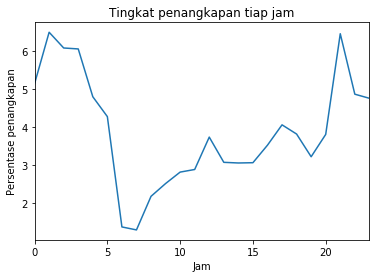

In [12]:
# kita akan lihat pada jam berapa paling sering terjadi penagkapan
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()*100
hourly_arrest_rate.plot()
plt.title('Tingkat penangkapan tiap jam')
plt.xlabel('Jam')
plt.ylabel('Persentase penangkapan')

BISA DILIHAT JELAS JIKA PENANGKAPAN LEBIH SERING TERJADI DI MALAM HARI DARI PUKUL 20.00 SAMPAI 4.00 PAGI

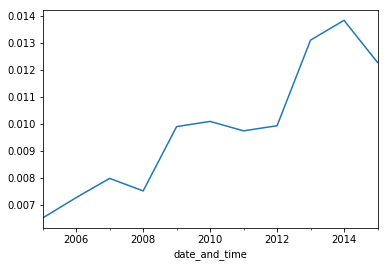

In [13]:
# berikutnya kita akan analisa tingkat penangkapan yang berhubungan dengan
# obat obatan terlarang
annual_drug_rate = ri.resample('A').drugs_related_stop.mean()
annual_drug_rate.plot()
plt.show()

Dapat dilihat bahwa penangkapan yang berkaitan dengan obat-obatan terus meningkat dengan drastis, 
namun hal ini bisa jadi terjadi bukan karena peredaran obat-obatan semakin parah tiap tahunya di amerika, bisa saja ini terjadi karena jumlah operasi pemeriksaan yang maningkat

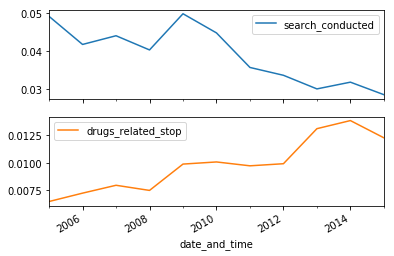

In [14]:
# kita bandingkan dengan data pemeriksaan polisi tiap tahun
annual_search_rate = ri.resample('A').search_conducted.mean()

annual = pd.concat([annual_search_rate, annual_drug_rate], axis=1)
annual.plot(subplots=True)
plt.show()

Bisa dilihat jika ternyata operasi pemesiksaan yang dilakukan polisi malah semakin menurun, hasil ini mendukung bahwa memang penggunaan obat-obatan terlarang semakin meningkat di amerika

## Penghitungan pelanggaran per Distrik

Negara bagian Rhode Island dipecah menjadi enam distrik kepolisian, juga dikenal sebagai zona. Bagaimana perbandingan pelanggaran lalu lintas pada zona-zona ini?

In [15]:
#buat tabel cross tab antara violation dan district
all_zone = pd.crosstab(ri.district, ri.violation)
all_zone

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


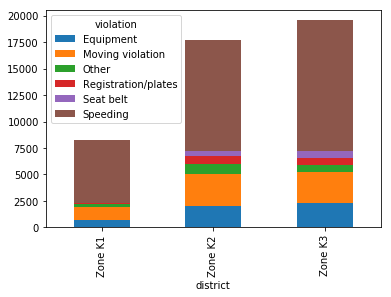

In [16]:
#kita akan periksa bagian zona k dulu
k_zone = all_zone.loc['Zone K1':'Zone K3']
#kita buat barplot unuk membandingkan categorical data
k_zone.plot(kind='bar', stacked=True)
plt.show()

dapat dilihat jelas jika pelanggaran paling tinggi terjadi di zone K3, akan tatepi janis pelanggaran untuk semua zona K memimiliki parbandingan yang serupa

Kita juga akan melakukan analisa durasi untuk setiap pemberhentian

In [17]:
#kita akan periksa isi kolom stop_durations
print(ri.stop_duration.unique())


['0-15 Min' '16-30 Min' '30+ Min']


karena nilai masih dalam bentuk objek kita bisa buat taksiran waktunya agar bisa kita hiting dalam float

In [18]:
# kita buat pemataan untuk mengkonvert nilai nya
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45
    }

# kita simpan datanya pada kolom stop_minutes
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8 23 45]


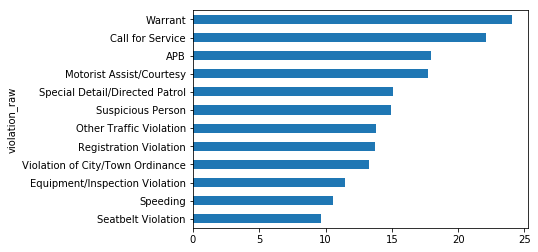

In [19]:
# kita hitung berapa lama rata-rata durasi pemberhentian untuk setiap pelanggaran
    
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# kita sort dan tampilkan dalam bar
stop_length.sort_values().plot(kind='barh')

plt.show()

## Penambahan data cuaca
kita juga akan menambahkan data cuaca untuk meilhat kaitan antara cuaca dengan pemberhentian kendaraan yang dilakukan polisi


              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


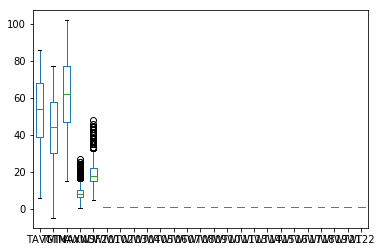

In [20]:
# baca data 'weather.csv' menjadi data frame 'weather'
weather = pd.read_csv('weather.csv')

# kita lihat data temperature
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# buat dalam bentuk box
weather.plot(kind='box')

plt.show()

Data suhu terlihat bagus sejauh ini: 
nilai-nilai TAVG berada di antara TMIN dan TMAX, dan pengukuran serta rentangnya tampak masuk akal.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


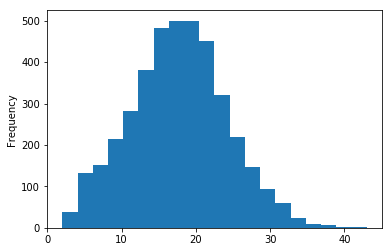

In [21]:
#kita perksa lebih jauh data temperature yang ada

# buat kolom 'TDIFF' yang merupakan selisih Tmax dan Tmin
weather['TDIFF']=weather.TMAX-weather.TMIN

# Describe  'TDIFF' 
print(weather.TDIFF.describe())

# kita tampilkan dalam bentuk histogram 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

plt.show()

kolom tidak memiliki nilai negatif dan distribusinya mendekati normal, 
keduanya merupakan tanda bahwa data dapat dipercaya.

pada dataframe weather terdapat kolom :

WT05 menunjukkan "Hail"/hujan es
WT11 menunjukkan "High or damaging winds"/ angin keras
WT17 menunjukkan "Freezing rain"/hujan dan seterusanya
kolom ini akan birisi nilai 1 jika terjadi dan Nan jika tidak
  

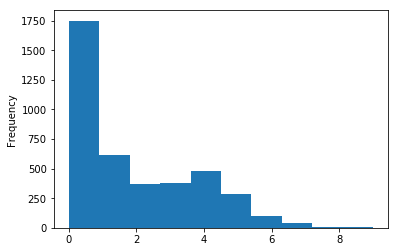

In [22]:
# kita buat dataframe untuk kolom 'WT01' sampai 'WT22' 
WT = weather.loc[:,'WT01':'WT22']

# kita hitung nilai penjumlahan per row untuk melihat sebarapa parah cuca pada hari itu
# semakin besar nilai semakin parah cuacanya
weather['bad_conditions'] = WT.sum(axis=1)

# kita ganti nilai Nan dengan nilai '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

Sepertinya sehari-hari tidak ada kondisi cuaca buruk, terlihat dari data yang didominasi nilai 0
dan hanya sebagian kecil hari yang memiliki lebih dari empat kondisi cuaca buruk.

dari nilai rating ini kita buat untuk mengklasifikasikan kondisi cuca pada waktu itu:
    nilai 0 untuk 'good'
    nilai 1 sampai 4 untuk 'bad'
    nilai 5 sampai 9 untuk 'worse'

In [23]:
# kita buat mapping untuk merubah nilai ratingnya
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad',
    5: 'worse', 6: 'worse', 7: 'worse', 8: 'worse',
    9: 'worse'
}

# gunakan mapping untuk kolom bad_conditions
weather['rating'] = weather.bad_conditions.map(mapping)

# kita lihat hasilnya
print(weather.rating.value_counts())

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Sistem peringkat ini harus membuat data kondisi cuaca lebih mudah dipahami.

In [24]:
# kita rubah series rating dari object menjadi category untuk menghemat memory
# buat list categories
cats=['good','bad','worse']

# kita rubah kolom rating menjadi tipe category
weather['rating'] = weather.rating.astype('category', categories=cats, ordered=True)

# kita lihat kolom 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


C:\Users\RoyhanM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


## Saatnya kita gabungkan data weather dan ri

In [39]:

# kita hanya butuh kolom 'DATE' dan 'rating' dari weather
weather_rating=weather[['DATE','rating']]

# kita lakukan left merge
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('date_and_time', inplace=True)

#lihat hasil gabungan
print(ri_weather.head())

                     level_0  index   stop_date driver_gender driver_race  \
date_and_time                                                               
2005-01-04 12:55:00        0      0  2005-01-04             M       White   
2005-01-23 23:15:00        1      1  2005-01-23             M       White   
2005-02-17 04:15:00        2      2  2005-02-17             M       White   
2005-02-20 17:15:00        3      3  2005-02-20             M       White   
2005-02-24 01:20:00        4      4  2005-02-24             F       White   

                                      violation_raw  violation  \
date_and_time                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   
2005-02-20 17:15:00                Call for Service      Other   
2005-02-24 01:20:00                        Speeding   Speeding  

In [40]:
#kita buang kolom yang tidak dibutuhkan
ri_weather.drop(['level_0','index','DATE','stop_date'],axis=1, inplace=True)

In [41]:
print(ri_weather.head())

                    driver_gender driver_race                   violation_raw  \
date_and_time                                                                   
2005-01-04 12:55:00             M       White  Equipment/Inspection Violation   
2005-01-23 23:15:00             M       White                        Speeding   
2005-02-17 04:15:00             M       White                        Speeding   
2005-02-20 17:15:00             M       White                Call for Service   
2005-02-24 01:20:00             F       White                        Speeding   

                     violation  search_conducted search_type   stop_outcome  \
date_and_time                                                                 
2005-01-04 12:55:00  Equipment             False         NaN       Citation   
2005-01-23 23:15:00   Speeding             False         NaN       Citation   
2005-02-17 04:15:00   Speeding             False         NaN       Citation   
2005-02-20 17:15:00      Other       

In [42]:
# kita akan lihat hubungan kolom violation dengan kondisi cuaca dan tingkat penangkapan pada kolom is_arrested

print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


Sangat unuk karena dapat diamati bahwa penangkapan semakin meningkat saat kondisi cuaca semakin buruk